In [1]:
import quandl

In [2]:
import pandas as pd

In [3]:
# dt=quandl.get("Wiki/googl",authtoken="ZYkHeBNX-gg1Q9H_PPJf")

In [4]:
# dt=dt.copy()

In [5]:
# dt.to_csv("quandledata.csv")

In [6]:
dt=pd.read_csv("quandledata.csv")

In [7]:
dt.shape

(3424, 13)

In [8]:
dt=dt[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]] 

In [9]:
dt.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,50.661387,54.708881,50.405597,54.322689,22834300.0
2,55.551482,56.915693,54.693835,54.869377,18256100.0
3,55.792225,55.972783,51.945350,52.597363,15247300.0
4,52.542193,54.167209,52.100830,53.164113,9188600.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dt["HL_PCT"]=(dt["Adj. High"]-dt["Adj. Close"])/dt["Adj. Close"]*100.0

In [12]:
dt.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
0,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563
1,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922
2,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433
3,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469
4,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792


In [13]:
dt["PCT_change"]=(dt["Adj. Close"]-dt["Adj. Open"])/dt["Adj. Open"]*100.0

In [14]:
dt=dt[["Adj. Close","HL_PCT","PCT_change","Adj. Volume"]]

In [15]:
dt.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
0,50.322842,3.712563,0.324968,44659000.0
1,54.322689,0.710922,7.227007,22834300.0
2,54.869377,3.729433,-1.227880,18256100.0
3,52.597363,6.417469,-5.726357,15247300.0
4,53.164113,1.886792,1.183658,9188600.0


In [16]:
forecast_col="Adj. Close"

In [17]:
dt.isna().sum()

Adj. Close     0
HL_PCT         0
PCT_change     0
Adj. Volume    0
dtype: int64

In [18]:
import math

In [19]:
len(dt)

3424

In [20]:
dt.fillna(-99999,inplace=True)

In [21]:
forecast_out=int(math.ceil(0.01*len(dt)))  # it means 1 % of prediction

In [22]:
forecast_out

35

In [23]:
dt["label"]=dt[forecast_col].shift(-forecast_out)

In [24]:
dt.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
0,50.322842,3.712563,0.324968,44659000.0,69.078238
1,54.322689,0.710922,7.227007,22834300.0,67.839414
2,54.869377,3.729433,-1.227880,18256100.0,68.912727
3,52.597363,6.417469,-5.726357,15247300.0,70.668146
4,53.164113,1.886792,1.183658,9188600.0,71.219849


In [25]:
dt.shape

(3424, 5)

In [26]:
dt.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
0,50.322842,3.712563,0.324968,44659000.0,69.078238
1,54.322689,0.710922,7.227007,22834300.0,67.839414
2,54.869377,3.729433,-1.227880,18256100.0,68.912727
3,52.597363,6.417469,-5.726357,15247300.0,70.668146
4,53.164113,1.886792,1.183658,9188600.0,71.219849


In [27]:
dt.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
0,50.322842,3.712563,0.324968,44659000.0,69.078238
1,54.322689,0.710922,7.227007,22834300.0,67.839414
2,54.869377,3.729433,-1.227880,18256100.0,68.912727
3,52.597363,6.417469,-5.726357,15247300.0,70.668146
4,53.164113,1.886792,1.183658,9188600.0,71.219849


In [28]:
dt.corr()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Adj. Close,1.000000,-0.213441,0.001786,-0.550264,0.988854
HL_PCT,-0.213441,1.000000,-0.712319,0.379402,-0.238008
PCT_change,0.001786,-0.712319,1.000000,-0.024881,0.007986
Adj. Volume,-0.550264,0.379402,-0.024881,1.000000,-0.556629
label,0.988854,-0.238008,0.007986,-0.556629,1.000000


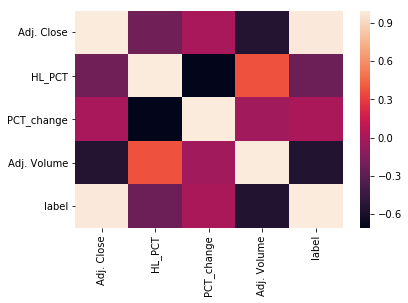

In [29]:
sns.heatmap(dt.corr())

In [30]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [31]:
from sklearn import preprocessing

In [32]:
import numpy as np

In [33]:
x=np.array(dt.drop(["label"],1))
x=preprocessing.scale(x)
x=x[:-forecast_out]
x_lately=x[-forecast_out:]


In [34]:
dt.dropna(inplace=True)
y=np.array(dt["label"])

In [35]:
# x=x[:-forecast_out+1]

In [36]:
dt.dropna(inplace=True)

In [37]:
y=np.array(dt["label"])

In [38]:
print(len(x),len(y))

3389 3389


In [39]:
y.shape

(3389,)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

In [42]:
cls=LinearRegression(n_jobs=-1)

In [43]:
cls.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [44]:
cls.score(x_ts,y_ts)

0.9757581621875534

In [45]:
s=Lasso()

In [46]:
s.fit(x_tr,y_tr)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
s.score(x_ts,y_ts)

0.9757810032319859

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
from sklearn.metrics import r2_score,mean_squared_error

In [50]:
a=cross_val_score(cls,x_tr,y_tr,cv=10)

In [51]:
a

array([0.98067656, 0.97488211, 0.9756013 , 0.97699471, 0.97924333,
       0.97562403, 0.98437987, 0.97725236, 0.97541627, 0.97985059])

In [52]:
a.mean()

0.9779921132246537

In [53]:
forecast_set=cls.predict(x_lately)

In [54]:
forecast_set

array([1076.36637996, 1091.04091374, 1105.02781819, 1099.2305995 ,
       1092.627278  , 1090.10676472, 1088.59481029, 1085.49261442,
       1079.28118387, 1074.94488616, 1072.71554505, 1093.1308854 ,
       1111.41872224, 1115.16062047, 1130.2769187 , 1134.17791024,
       1132.45745553, 1130.28850295, 1131.92515744, 1151.10496933,
       1149.37410357, 1159.55641018, 1155.97521965, 1164.01520171,
       1184.94589962, 1196.67379769, 1190.47341936, 1202.76075958,
       1208.17763716, 1206.43246456, 1197.21939168, 1202.60645949,
       1201.5271377 , 1136.65247194, 1083.43273584])

In [58]:
pr=cls.predict(x_ts)

In [59]:
y_ts

array([ 245.01634198,  695.35      ,  238.93256193,  351.44989215,
       1044.15      ,  214.2413425 ,  250.95968852, 1006.94      ,
        202.11892175,  243.24587672,  544.53      ,  102.69200037,
        202.64554739,  206.22660176,  730.55      ,  257.52495487,
        261.38687625,   71.21984885,  313.05637504,   97.83199801,
        145.30905513,  286.91066574,  289.65413456,  584.31372048,
        241.77132492,  849.87      ,  547.73      ,  280.39053873,
        507.27089666,  147.01381757,  451.70436811,  262.82631967,
        159.95376194,  304.85606146,  257.85096122,  205.23353627,
        294.06274352,  791.47      ,  193.49730765,  295.02571612,
        497.06      ,  555.17376824,  198.63316154,  759.47      ,
        358.70227957,  730.3       ,  592.42      ,   88.50821639,
        745.98      ,  847.27      ,  740.07      ,   92.15948751,
        243.17565997,  529.28      ,  378.08210323,  704.16      ,
        166.12280519,  285.66181064,  533.20094022,  263.38805

In [72]:
a=[]
a.append(mean_squared_error(pr,y_ts))
print(a)

[1576.3816829396108]


In [64]:
r2_score(y_ts,pr)

0.9757581621875534

In [65]:
cls.intercept_

419.4192457985019

In [66]:
cls.coef_

array([260.0787175 ,  -0.93984183,   0.30610529,  -3.23857833])